<a href="https://colab.research.google.com/github/ykopoblete/crypto/blob/main/TRXandBlocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('max_columns', None)
import warnings
warnings.simplefilter('ignore')
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 24})

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
%cd /content/gdrive/MyDrive/

/content/gdrive/MyDrive


In [4]:
!ls

'222.964-1 LIQ.pdf'
 33-16-PDF.gdoc
 33-16-PDF.pdf
 37-15-PDF.pdf
 96572420-6_39_003717940.pdf
 AL.docx
 ALErCE
'Apoyo Desafío - Inferencia de tópicos con EM.zip'
'Apoyo Desafío - Inferencia de tópicos con EM.zip (Unzipped Files)'
'Aurélien Géron - Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow_ Concepts, Tools, and Techniques to Build Intelligent Systems-O’Reilly Media (2019).pdf'
 blocks_test_3.csv
 checkpoint
 Classroom
'Colab Notebooks'
 Costeo.py
'CV YerkoPobleteM 2021.pdf'
'Entregable_Dashboard.pbix (Unzipped Files)'
 F201610T33N283466.xml
'FORMULARIO YERKO POBLETE.jpeg'
 glove.42B.300d.txt
 Hito2_prueba1_YerkoPobleteTamaraAraya.zip
 Hito3_TamaraArayaYerkoPoblete.zip
'Ingrid Dinamarca 03.20.gsheet'
 Lab.py
 masks
 metadata
'NVIDIA-Linux-x86_64-470.94 (1).run'
 NVIDIA-Linux-x86_64-470.94.run
'ORDENES YERKO POBLETE.pdf'
 Orden_médica.pdf
 Oversight_2021.pdf
 predicted.csv
'Presupuesto mensual.gsheet'
 PROTOCOLO.pdf
 reference.csv
 RelatedWork
 Tarea2_dato

Reading files

In [5]:
df_2 = pd.read_csv('transactions_test_3.csv')
df_block_2 = pd.read_csv('blocks_test_3.csv')

In [6]:
print(df_2.shape)
print(df_block_2.shape)

(2006183, 15)
(10358, 19)


Exploring data types

In [7]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2006183 entries, 0 to 2006182
Data columns (total 15 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   hash                      object 
 1   nonce                     int64  
 2   block_hash                object 
 3   block_number              int64  
 4   transaction_index         int64  
 5   from_address              object 
 6   to_address                object 
 7   value                     object 
 8   gas                       int64  
 9   gas_price                 int64  
 10  input                     object 
 11  block_timestamp           int64  
 12  max_fee_per_gas           float64
 13  max_priority_fee_per_gas  float64
 14  transaction_type          int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 229.6+ MB


In [8]:
df_2.isna().sum()

hash                             0
nonce                            0
block_hash                       0
block_number                     0
transaction_index                0
from_address                     0
to_address                    1421
value                            0
gas                              0
gas_price                        0
input                            0
block_timestamp                  0
max_fee_per_gas             360003
max_priority_fee_per_gas    360003
transaction_type                 0
dtype: int64

# Transformation of data

Changing data type of "value" and "gas_price" to float and transforming from Wei to Ether

In [9]:
df_2['value'] = df_2['value'].astype('float')
df_2['value'] = df_2['value'] / 1e+18

##gas price ether
df_2['gas_price_ether'] = df_2['gas_price'] / 1e+18
df_2.head()

,hash,nonce,block_hash,block_number,transaction_index,from_address,to_address,value,gas,gas_price,input,block_timestamp,max_fee_per_gas,max_priority_fee_per_gas,transaction_type,gas_price_ether
0,0x72356cf6ab1a10503c1797c5b7c011295759a01a4b49...,175157,0x14ccfc80745e0c3dc6e0d96f0612467b49e92080b345...,14400400,0,0x0f4ee9631f4be0a63756515141281a3e2b293bbe,0xd9e1ce17f2641f24ae83637ab66a2cca9c378b9f,0.000000,250000,122791169883,0x38ed1739000000000000000000000000000000000000...,1647471892,NaN,NaN,0,1.227912e-07
1,0x98b982afd3606b008ea41fac973f5cb6c2dbf9692d57...,169,0x14ccfc80745e0c3dc6e0d96f0612467b49e92080b345...,14400400,1,0x8fe2bb5a6542a113b82bdf5f66112f26d949a392,0xad4121b272d08cdfbf49100b7a9194d704091fbc,0.005012,21000,89150503673,0x,1647471892,NaN,NaN,0,8.915050e-08
2,0x16c1727113861241099995b7201e1cf312a440e1c854...,70,0x14ccfc80745e0c3dc6e0d96f0612467b49e92080b345...,14400400,2,0xad4121b272d08cdfbf49100b7a9194d704091fbc,0x9813037ee2218799597d83d4a5b6f3b6778218d9,0.000000,56224,89150503673,0xa9059cbb0000000000000000000000008fe2bb5a6542...,1647471892,NaN,NaN,0,8.915050e-08
3,0xe0373200b82fd40d2f2f12405c110b6e406e892ba003...,6917,0x14ccfc80745e0c3dc6e0d96f0612467b49e92080b345...,14400400,3,0x839d4641f97153b0ff26ab837860c479e2bd0242,0x1111111254fb6c44bac0bed2854e76f90643097d,0.000000,228235,79512599627,0xe449022e000000000000000000000000000000000000...,1647471892,9.458323e+11,6.229162e+09,2,7.951260e-08
4,0x2f2e29cbcf98c1560b52b475befacc4d2a7f7f2ba672...,41872,0x14ccfc80745e0c3dc6e0d96f0612467b49e92080b345...,14400400,4,0xdf1553a2130cbafa70a35e68efc6ccf67f0a278c,0x4f13d7da9e805d3ffcc40edc5a01d4bcd216b009,0.029333,50000,76284438018,0x,1647471892,9.990000e+11,3.001000e+09,2,7.628444e-08


Conversion from timestamp to datetime format

In [10]:
df_2['date'] = df_2['block_timestamp'].apply(lambda x: datetime.fromtimestamp(x))
df_2['day'] = df_2['date'].dt.day
df_2['hour'] = df_2['date'].dt.hour
df_2['second'] = df_2['date'].dt.second

Just to look how many different values are

In [11]:
## Unique values for days and hour

print("Unique values for day:",df_2['day'].unique())
print("Unique values for hour",df_2['hour'].unique())

## Grouping by day and counting amount of TRX
count_day = df_2.groupby('day').size().reset_index(name='count')
count_day

Unique values for day: [16 17 18]
Unique values for hour [23 21 22  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


,day,count
0,16,111378
1,17,1174532
2,18,720273


Getting different date formats

In [12]:
df_2['date2'] = df_2['date'].apply(lambda x: x.strftime("%Y-%m-%d %H:%M"))
df_2['date3'] = df_2['date'].apply(lambda x: x.strftime("%Y-%m-%d %H"))

In [13]:
## Exploring dataframe
df_2.head()

,hash,nonce,block_hash,block_number,transaction_index,from_address,to_address,value,gas,gas_price,input,block_timestamp,max_fee_per_gas,max_priority_fee_per_gas,transaction_type,gas_price_ether,date,day,hour,second,date2,date3
0,0x72356cf6ab1a10503c1797c5b7c011295759a01a4b49...,175157,0x14ccfc80745e0c3dc6e0d96f0612467b49e92080b345...,14400400,0,0x0f4ee9631f4be0a63756515141281a3e2b293bbe,0xd9e1ce17f2641f24ae83637ab66a2cca9c378b9f,0.000000,250000,122791169883,0x38ed1739000000000000000000000000000000000000...,1647471892,NaN,NaN,0,1.227912e-07,2022-03-16 23:04:52,16,23,52,2022-03-16 23:04,2022-03-16 23
1,0x98b982afd3606b008ea41fac973f5cb6c2dbf9692d57...,169,0x14ccfc80745e0c3dc6e0d96f0612467b49e92080b345...,14400400,1,0x8fe2bb5a6542a113b82bdf5f66112f26d949a392,0xad4121b272d08cdfbf49100b7a9194d704091fbc,0.005012,21000,89150503673,0x,1647471892,NaN,NaN,0,8.915050e-08,2022-03-16 23:04:52,16,23,52,2022-03-16 23:04,2022-03-16 23
2,0x16c1727113861241099995b7201e1cf312a440e1c854...,70,0x14ccfc80745e0c3dc6e0d96f0612467b49e92080b345...,14400400,2,0xad4121b272d08cdfbf49100b7a9194d704091fbc,0x9813037ee2218799597d83d4a5b6f3b6778218d9,0.000000,56224,89150503673,0xa9059cbb0000000000000000000000008fe2bb5a6542...,1647471892,NaN,NaN,0,8.915050e-08,2022-03-16 23:04:52,16,23,52,2022-03-16 23:04,2022-03-16 23
3,0xe0373200b82fd40d2f2f12405c110b6e406e892ba003...,6917,0x14ccfc80745e0c3dc6e0d96f0612467b49e92080b345...,14400400,3,0x839d4641f97153b0ff26ab837860c479e2bd0242,0x1111111254fb6c44bac0bed2854e76f90643097d,0.000000,228235,79512599627,0xe449022e000000000000000000000000000000000000...,1647471892,9.458323e+11,6.229162e+09,2,7.951260e-08,2022-03-16 23:04:52,16,23,52,2022-03-16 23:04,2022-03-16 23
4,0x2f2e29cbcf98c1560b52b475befacc4d2a7f7f2ba672...,41872,0x14ccfc80745e0c3dc6e0d96f0612467b49e92080b345...,14400400,4,0xdf1553a2130cbafa70a35e68efc6ccf67f0a278c,0x4f13d7da9e805d3ffcc40edc5a01d4bcd216b009,0.029333,50000,76284438018,0x,1647471892,9.990000e+11,3.001000e+09,2,7.628444e-08,2022-03-16 23:04:52,16,23,52,2022-03-16 23:04,2022-03-16 23


# Data Exploration

Grouping by Date (Day-Hour) and counting amount of TRX

In [14]:
df_dates_groups = df_2.groupby('date3').size().reset_index(name='count')

Plotting

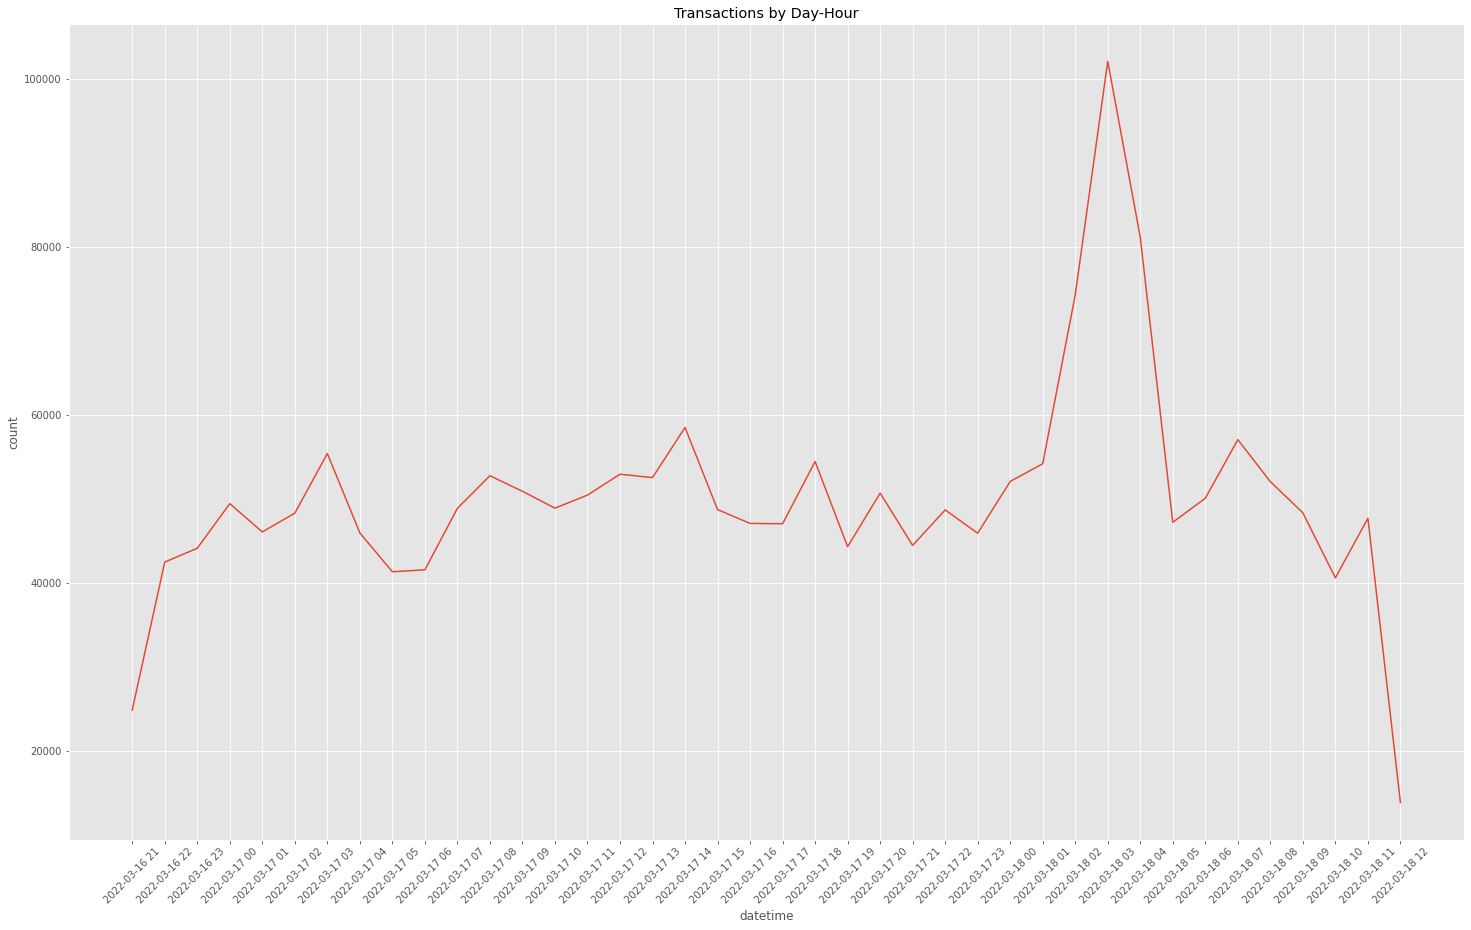

In [61]:
plt.figure(figsize=(25,15))
sns.lineplot(df_dates_groups['date3'], df_dates_groups['count'])
plt.title('Transactions by Day-Hour')
plt.xticks(rotation= 45)
plt.xlabel('datetime')
plt.show()

Working with "nonce" field. nonce = amount of tRx done before the actual trx

In [16]:
'''
nonce = how many trx were done before this trx registered

Giving range to nonce
A = less than 1000
B = 1000 - 10000
C = 10000 - 50000
D = 50000 +++
'''

df_2['nonce_range'] = df_2['nonce']
df_2['nonce_range'] = np.where(df_2['nonce'] < 1000,"A", df_2['nonce_range'])
df_2['nonce_range'] = np.where((df_2['nonce'] >= 1000) & (df_2['nonce'] < 10000),"B", df_2['nonce_range'])
df_2['nonce_range'] = np.where((df_2['nonce'] >= 10000) & (df_2['nonce'] < 50000),"C", df_2['nonce_range'])
df_2['nonce_range'] = np.where((df_2['nonce'] >= 50000),"D",df_2['nonce_range'])

In [17]:
## Getting rate of every nonce_range
df_2['nonce_range'].value_counts('%')

A    0.667417
D    0.226141
B    0.072135
C    0.034306
Name: nonce_range, dtype: float64

In [18]:
## Getting count of every nonce_range
df_2['nonce_range'].value_counts()

A    1338960
D     453681
B     144717
C      68825
Name: nonce_range, dtype: int64

Plotting Nonce Range Count

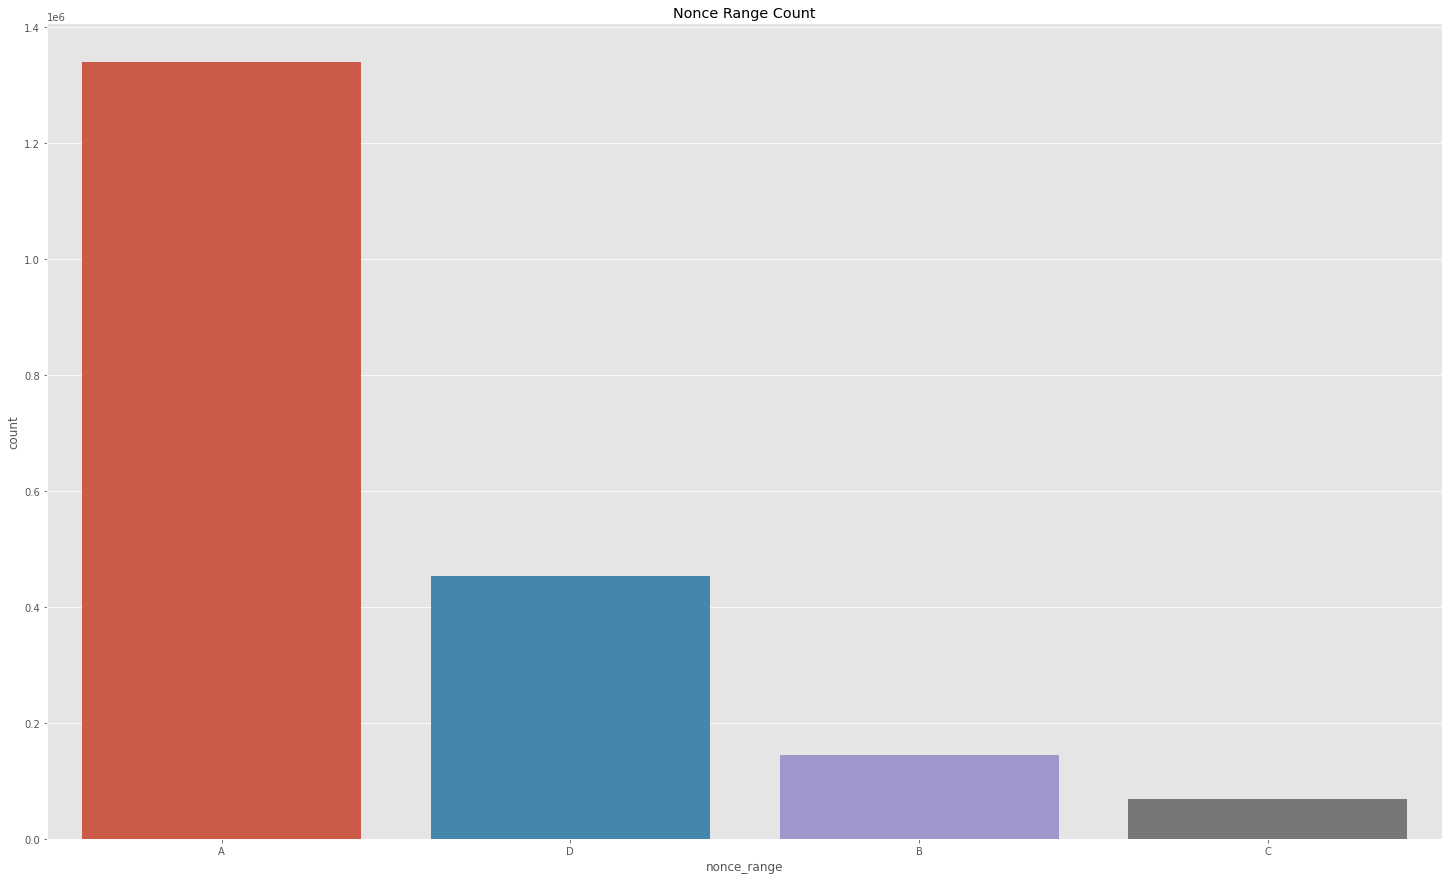

In [19]:
plt.figure(figsize=(25,15))
sns.barplot(x=df_2['nonce_range'].value_counts().index, y=df_2['nonce_range'].value_counts().values)
plt.xlabel('nonce_range')
plt.ylabel('count')
plt.title('Nonce Range Count')
plt.show()

Grouping by date and nonce_range

In [20]:
count_dayHour_nonceRange = df_2.groupby(['date3', 'nonce_range']).size().reset_index(name='count')
count_dayHour_nonceRange

,date3,nonce_range,count
0,2022-03-16 21,A,16508
1,2022-03-16 21,B,2122
2,2022-03-16 21,C,733
3,2022-03-16 21,D,5475
4,2022-03-16 22,A,27279
...,...,...,...
155,2022-03-18 11,D,10858
156,2022-03-18 12,A,8542
157,2022-03-18 12,B,1285
158,2022-03-18 12,C,596


Plotting

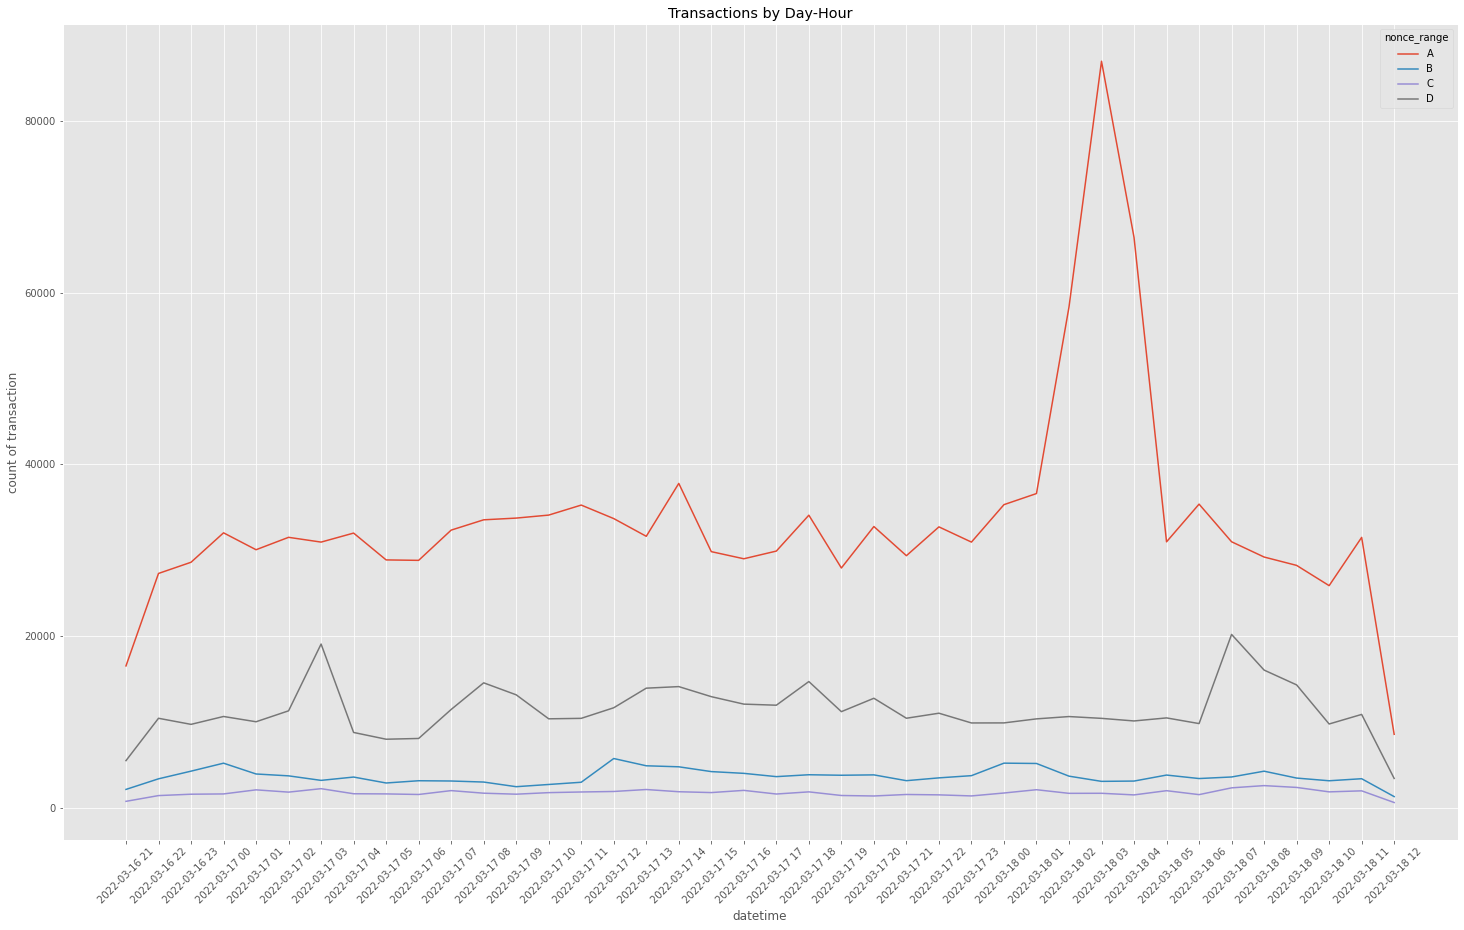

In [28]:
plt.figure(figsize=(25,15))
sns.lineplot(count_dayHour_nonceRange['date3'], count_dayHour_nonceRange['count'], hue=count_dayHour_nonceRange['nonce_range'])
plt.title('Transactions by Day-Hour')
plt.xticks(rotation= 45)
plt.xlabel('datetime')
plt.ylabel('count of transaction')
plt.show()

__Comments:__
* People with less than 1000 trxs before the actual are more active than people with more than 1000 trxs
* People with [1000 - 50000] trxs before the actual are less active than others 

Getting amount of different wallets in the registers

In [22]:
## Different wallets
print("Different from wallets:", df_2['from_address'].nunique())
print("Different to wallets:", df_2['to_address'].nunique())

Different from wallets: 715359
Different to wallets: 434923


In [23]:
#### Grouping wallet addresses "from address"
df_2.groupby('from_address').size().reset_index(name='count').sort_values(by=['count'], ascending=False)

,from_address,count
656020,0xea674fdde714fd979de3edf0f56aa9716b898ec8,41206
171608,0x3cd751e6b0078be393132286c442345e5dc49699,25242
509176,0xb5d85cbf7cb3ee0d56b3bb207d5fc4b82f43f511,23904
621482,0xddfabcdc4d8ffc6d5beaf154f18b778f892a0740,21416
658057,0xeb2629a2734e272bcc07bda959863f316f4bd4cf,20147
...,...,...
295195,0x694dbf6653dcbb406cfa8ab5a25007bef8aa1d3f,1
295193,0x694d96eaf57971d1ff40c877ae880539057f004b,1
295192,0x694d8c4314c0a7299ebb461eeaeeda7b109ae276,1
295190,0x694d7537945de1b3dd14ca8b7a1d78cffb343d71,1


__Comments:__ In 2 millions registers we have 700k different "from addresses"

In [24]:
### Grouping wallet addresses "to address"
df_2.groupby('to_address').size().reset_index(name='count').sort_values(by=['count'], ascending=False)

,to_address,count
69482,0x28c6c06298d514db089934071355e5743bf21d60,155106
372431,0xdac17f958d2ee523a2206206994597c13d831ec7,111867
177586,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,90258
215594,0x7f268357a8c2552623316e2562d90e642bb538e5,89459
272867,0xa090e606e30bd747d4e6245a1517ebe430f0057e,64730
...,...,...
49965,0x1d54a477a0f4cf5160991a7646b2582061e84a25,1
193939,0x72683398d42334be74b8191b57fee2ce5b15335b,1
193938,0x726820da5bfd6c04718e5e8ff5325b94ee9b3908,1
193937,0x7268066df70af74cd6cae3675bff51c43118cc3c,1


__Comments:__ In 2 millions registers we have 400k different from addresses 

In [25]:
## Sum of ether sent by address
group_etherSent = df_2.groupby(['from_address'])['value'].sum().reset_index(name='Total ether sent').sort_values(by=('Total ether sent'), ascending=False)
group_etherSent

,from_address,Total ether sent
115561,0x28c6c06298d514db089934071355e5743bf21d60,174001.241227
379226,0x876eabf441b2ee5b5b0554fd502a8e0600950cfa,50643.686863
539241,0xc098b2a3aa256d2140208c3de6543aaef5cd3a94,44591.406943
311813,0x6f466e6989dff8064eab1980ccd04648ea95a2c6,43322.569253
665365,0xedc7001e99a37c3d23b5f7974f837387e09f9c93,42691.762342
...,...,...
595085,0xd48c857cfce094758cedc780a3d78addfae71a36,0.000000
356733,0x7f65cd6a1bdca64b5c0b720e378d516b027a2946,0.000000
356728,0x7f654bed27f547ba6ed5c59f267f664cb0f90349,0.000000
356726,0x7f653a88c158b87354d925621509a05c3624ca65,0.000000


In [26]:
## Sum of ether received by address
group_etherReceived = df_2.groupby(['to_address'])['value'].sum().reset_index(name='Total ether received').sort_values(by=('Total ether received'), ascending=False)
group_etherReceived

,to_address,Total ether received
69482,0x28c6c06298d514db089934071355e5743bf21d60,225697.035960
177586,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,78297.588412
215594,0x7f268357a8c2552623316e2562d90e642bb538e5,74989.368503
328114,0xc098b2a3aa256d2140208c3de6543aaef5cd3a94,63798.874149
327409,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,48689.803183
...,...,...
273534,0xa0f0546eb5e3ee7e8cfc5da12e5949f3ae622675,0.000000
273547,0xa0f38233688bb578c0a88102a95b846c18bc0ba7,0.000000
273559,0xa0f5505dc06ebe8ee8cbdc2059eade0b9f35cbc2,0.000000
273570,0xa0f75c0538a324cd49cb8077ea6647deeff2d877,0.000000


Taking "from" and "to" addresses with more than 1000 transactions

In [32]:
#from addresses
from_addresses = df_2.groupby('from_address').size().reset_index(name='count').sort_values(by=['count'], ascending=False)
from_addresses = from_addresses[from_addresses['count'] > 1000]
from_addresses

,from_address,count
656020,0xea674fdde714fd979de3edf0f56aa9716b898ec8,41206
171608,0x3cd751e6b0078be393132286c442345e5dc49699,25242
509176,0xb5d85cbf7cb3ee0d56b3bb207d5fc4b82f43f511,23904
621482,0xddfabcdc4d8ffc6d5beaf154f18b778f892a0740,21416
658057,0xeb2629a2734e272bcc07bda959863f316f4bd4cf,20147
...,...,...
537735,0xc00eebe4e2be29679781fc5fc350057ee8132bab,1254
533909,0xbeb06b3cd92f4048e272ac3c6815e1f2ac539bf1,1110
73844,0x19f494583c7c933be7b0ee58104ddafac1e8adfa,1099
513018,0xb739d0895772dbb71a89a3754a160269068f0d45,1080


In [30]:
#to addresses
to_addresses = df_2.groupby('to_address').size().reset_index(name='count').sort_values(by=['count'], ascending=False)
to_addresses = to_addresses[to_addresses['count'] > 1000]
to_addresses

,to_address,count
69482,0x28c6c06298d514db089934071355e5743bf21d60,155106
372431,0xdac17f958d2ee523a2206206994597c13d831ec7,111867
177586,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,90258
215594,0x7f268357a8c2552623316e2562d90e642bb538e5,89459
272867,0xa090e606e30bd747d4e6245a1517ebe430f0057e,64730
...,...,...
430352,0xfd4492e70df97a6155c6d244f5ec5b5a39b6f096,1041
257866,0x97e165501626dca8ce904a2ce0a31ebc332ab509,1037
110699,0x40e0a6ef9dbadfc83c5e0d15262feb4638588d77,1022
15708,0x090185f2135308bad17527004364ebcc2d37e5f6,1011


Filtering main dataframe with "from address" and "to address" with more frequency

In [51]:
main_addresses_together = df_2[(df_2['from_address'].isin(from_addresses['from_address'])) | (df_2['to_address'].isin(to_addresses['to_address']))] 

In [52]:
main_addresses_together

,hash,nonce,block_hash,block_number,transaction_index,from_address,to_address,value,gas,gas_price,input,block_timestamp,max_fee_per_gas,max_priority_fee_per_gas,transaction_type,gas_price_ether,date,day,hour,second,date2,date3,nonce_range
0,0x72356cf6ab1a10503c1797c5b7c011295759a01a4b49...,175157,0x14ccfc80745e0c3dc6e0d96f0612467b49e92080b345...,14400400,0,0x0f4ee9631f4be0a63756515141281a3e2b293bbe,0xd9e1ce17f2641f24ae83637ab66a2cca9c378b9f,0.000000,250000,122791169883,0x38ed1739000000000000000000000000000000000000...,1647471892,NaN,NaN,0,1.227912e-07,2022-03-16 23:04:52,16,23,52,2022-03-16 23:04,2022-03-16 23,D
3,0xe0373200b82fd40d2f2f12405c110b6e406e892ba003...,6917,0x14ccfc80745e0c3dc6e0d96f0612467b49e92080b345...,14400400,3,0x839d4641f97153b0ff26ab837860c479e2bd0242,0x1111111254fb6c44bac0bed2854e76f90643097d,0.000000,228235,79512599627,0xe449022e000000000000000000000000000000000000...,1647471892,9.458323e+11,6.229162e+09,2,7.951260e-08,2022-03-16 23:04:52,16,23,52,2022-03-16 23:04,2022-03-16 23,B
5,0xbdbe2c358f714a71fe205b84793612c021d0a2297cde...,201,0x14ccfc80745e0c3dc6e0d96f0612467b49e92080b345...,14400400,5,0xc3d2a46894cbab35b8fc2c1613f91cc76fdd3419,0xc3ae6e60a37a5f7d6d68e60c45b1ae50da233bd4,0.000000,44825,75783438018,0xf242432a000000000000000000000000c3d2a46894cb...,1647471892,1.642216e+11,2.500000e+09,2,7.578344e-08,2022-03-16 23:04:52,16,23,52,2022-03-16 23:04,2022-03-16 23,A
9,0x84792f29dd7744a1ff0ce3f809db78bcac7cc08348a7...,220,0x14ccfc80745e0c3dc6e0d96f0612467b49e92080b345...,14400400,9,0xd4f7d2cd9b7965d399fc116679ce0dcd10d7e85f,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0.450000,45038,75283438018,0xd0e30db0,1647471892,1.071190e+11,2.000000e+09,2,7.528344e-08,2022-03-16 23:04:52,16,23,52,2022-03-16 23:04,2022-03-16 23,A
10,0x39e06957f5ef19dfdf1049e457da82d29dd3e2b641c4...,5362223,0x14ccfc80745e0c3dc6e0d96f0612467b49e92080b345...,14400400,10,0xddfabcdc4d8ffc6d5beaf154f18b778f892a0740,0x122dd1e610efa9b884910eea86e8fb79ee982620,0.366296,21000,75283438018,0x,1647471892,1.450000e+11,2.000000e+09,2,7.528344e-08,2022-03-16 23:04:52,16,23,52,2022-03-16 23:04,2022-03-16 23,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006168,0x50f32dec208aeadaa286fe88c432252b57c045c2e67d...,93629,0xe04315ac25d3a5802a48ef282bcbdfbc3301d3180ad0...,14410299,132,0x6474bf7e1e9e9a76b3e77a186ee114b0e3ba72c8,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0.000000,84000,24895403069,0xa9059cbb000000000000000000000000fe0cfe353da4...,1647604979,5.475330e+10,1.197000e+09,2,2.489540e-08,2022-03-18 12:02:59,18,12,59,2022-03-18 12:02,2022-03-18 12,D
2006169,0x611d7c647e7b7a7400d6bcd35b35f8d64f54a1c3022d...,61608,0xe04315ac25d3a5802a48ef282bcbdfbc3301d3180ad0...,14410299,133,0xd86c6ae32199d1c14e573f3bd9987dcc1b4fec49,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0.000000,84000,24895403069,0xa9059cbb000000000000000000000000440749366745...,1647604979,5.475330e+10,1.197000e+09,2,2.489540e-08,2022-03-18 12:02:59,18,12,59,2022-03-18 12:02,2022-03-18 12,D
2006170,0xa11612e01d515a37afa33f46760ec3c33228e3b35100...,9773,0xe04315ac25d3a5802a48ef282bcbdfbc3301d3180ad0...,14410299,134,0x2ce9f4fc52af5498b99597141e66a4273aa74983,0x3845badade8e6dff049820680d1f14bd3903a5d0,0.000000,61588,24895403069,0xa9059cbb000000000000000000000000a6ba6342d39b...,1647604979,5.475330e+10,1.197000e+09,2,2.489540e-08,2022-03-18 12:02:59,18,12,59,2022-03-18 12:02,2022-03-18 12,B
2006179,0x9d673e2eb570af096b7445b4a2e12b54c8b4e6c57773...,586,0xe04315ac25d3a5802a48ef282bcbdfbc3301d3180ad0...,14410299,143,0xb36b2106b94f3c158d6de7f809a2b8d3190379ba,0x11111112542d85b3ef69ae05771c2dccff4faa26,0.000000,177919,24698403069,0x2e95b6c8000000000000000000000000990f341946a3...,1647604979,3.211927e+10,1.000000e+09,2,2.469840e-08,2022-03-18 12:02:59,18,12,59,2022-03-18 12:02,2022-03-18 12,A


Filtering main dataframe just with mains "from address"

In [54]:
main_from_addresses = df_2[(df_2['from_address'].isin(from_addresses['from_address']))] 
main_from_addresses

,hash,nonce,block_hash,block_number,transaction_index,from_address,to_address,value,gas,gas_price,input,block_timestamp,max_fee_per_gas,max_priority_fee_per_gas,transaction_type,gas_price_ether,date,day,hour,second,date2,date3,nonce_range
10,0x39e06957f5ef19dfdf1049e457da82d29dd3e2b641c4...,5362223,0x14ccfc80745e0c3dc6e0d96f0612467b49e92080b345...,14400400,10,0xddfabcdc4d8ffc6d5beaf154f18b778f892a0740,0x122dd1e610efa9b884910eea86e8fb79ee982620,0.366296,21000,75283438018,0x,1647471892,1.450000e+11,2.000000e+09,2,7.528344e-08,2022-03-16 23:04:52,16,23,52,2022-03-16 23:04,2022-03-16 23,D
27,0x9507040e66c7f07a18a45232b63825516cb2e660834d...,41401504,0x4b11717f074f0781826c6d75ea3610b81d6a51cdc2d7...,14400401,0,0xea674fdde714fd979de3edf0f56aa9716b898ec8,0xd06ca9ae612f6641d237dd3698fb426c144d6777,0.098451,250000,66754582575,0x,1647471894,1.487654e+11,1.000000e+09,2,6.675458e-08,2022-03-16 23:04:54,16,23,54,2022-03-16 23:04,2022-03-16 23,D
28,0xff16d05d397b7db4d32896040b00364f86dc2f4f6b13...,41401505,0x4b11717f074f0781826c6d75ea3610b81d6a51cdc2d7...,14400401,1,0xea674fdde714fd979de3edf0f56aa9716b898ec8,0x4dc5a3b9a73325a9d45c66622e427fdeb70cac1b,0.199011,250000,66754582575,0x,1647471894,1.487654e+11,1.000000e+09,2,6.675458e-08,2022-03-16 23:04:54,16,23,54,2022-03-16 23:04,2022-03-16 23,D
29,0xc4efbfe88dd1545dc23813b793a4985049ee6457f512...,41401506,0x4b11717f074f0781826c6d75ea3610b81d6a51cdc2d7...,14400401,2,0xea674fdde714fd979de3edf0f56aa9716b898ec8,0x143ae175362cf890c6a0ce67f81a794d1307869d,0.123691,250000,66754582575,0x,1647471894,1.487654e+11,1.000000e+09,2,6.675458e-08,2022-03-16 23:04:54,16,23,54,2022-03-16 23:04,2022-03-16 23,D
30,0x362615dc5de92a58571e0d096e415ae04befebebb6b6...,41401507,0x4b11717f074f0781826c6d75ea3610b81d6a51cdc2d7...,14400401,3,0xea674fdde714fd979de3edf0f56aa9716b898ec8,0x7b669327c157210dae128f35e445d4591b217b85,1.998969,250000,66754582575,0x,1647471894,1.487654e+11,1.000000e+09,2,6.675458e-08,2022-03-16 23:04:54,16,23,54,2022-03-16 23:04,2022-03-16 23,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006116,0x1ca207663cf11804dbfb78c03a133debc7367a7c6fce...,6354409,0xe04315ac25d3a5802a48ef282bcbdfbc3301d3180ad0...,14410299,80,0xb5d85cbf7cb3ee0d56b3bb207d5fc4b82f43f511,0xdac17f958d2ee523a2206206994597c13d831ec7,0.000000,250000,25698403069,0xa9059cbb0000000000000000000000004a40482b70c9...,1647604979,5.400000e+10,2.000000e+09,2,2.569840e-08,2022-03-18 12:02:59,18,12,59,2022-03-18 12:02,2022-03-18 12,D
2006118,0x9338cc4db2a4c4616176aa266fc7e601a0bba515be28...,6354410,0xe04315ac25d3a5802a48ef282bcbdfbc3301d3180ad0...,14410299,82,0xb5d85cbf7cb3ee0d56b3bb207d5fc4b82f43f511,0xdac17f958d2ee523a2206206994597c13d831ec7,0.000000,250000,25698403069,0xa9059cbb00000000000000000000000007c636153556...,1647604979,5.400000e+10,2.000000e+09,2,2.569840e-08,2022-03-18 12:02:59,18,12,59,2022-03-18 12:02,2022-03-18 12,D
2006119,0xab316b8b0f6e710485562d0c1b6ad6d88f5768b876ac...,5382310,0xe04315ac25d3a5802a48ef282bcbdfbc3301d3180ad0...,14410299,83,0xddfabcdc4d8ffc6d5beaf154f18b778f892a0740,0xb7b43f86a80fd15eaeb890173eef448e1ddac803,0.286199,21000,25698403069,0x,1647604979,5.400000e+10,2.000000e+09,2,2.569840e-08,2022-03-18 12:02:59,18,12,59,2022-03-18 12:02,2022-03-18 12,D
2006125,0x08675eee822c1b864ba88909521409f70cdbc2e84918...,6354411,0xe04315ac25d3a5802a48ef282bcbdfbc3301d3180ad0...,14410299,89,0xb5d85cbf7cb3ee0d56b3bb207d5fc4b82f43f511,0xdac17f958d2ee523a2206206994597c13d831ec7,0.000000,250000,25698403069,0xa9059cbb000000000000000000000000c8b228a9624c...,1647604979,5.400000e+10,2.000000e+09,2,2.569840e-08,2022-03-18 12:02:59,18,12,59,2022-03-18 12:02,2022-03-18 12,D


Filtering main dataframe just with mains "to addresses"

In [55]:
main_to_addresses = df_2[(df_2['to_address'].isin(to_addresses['to_address']))] 
main_to_addresses

,hash,nonce,block_hash,block_number,transaction_index,from_address,to_address,value,gas,gas_price,input,block_timestamp,max_fee_per_gas,max_priority_fee_per_gas,transaction_type,gas_price_ether,date,day,hour,second,date2,date3,nonce_range
0,0x72356cf6ab1a10503c1797c5b7c011295759a01a4b49...,175157,0x14ccfc80745e0c3dc6e0d96f0612467b49e92080b345...,14400400,0,0x0f4ee9631f4be0a63756515141281a3e2b293bbe,0xd9e1ce17f2641f24ae83637ab66a2cca9c378b9f,0.00,250000,122791169883,0x38ed1739000000000000000000000000000000000000...,1647471892,NaN,NaN,0,1.227912e-07,2022-03-16 23:04:52,16,23,52,2022-03-16 23:04,2022-03-16 23,D
3,0xe0373200b82fd40d2f2f12405c110b6e406e892ba003...,6917,0x14ccfc80745e0c3dc6e0d96f0612467b49e92080b345...,14400400,3,0x839d4641f97153b0ff26ab837860c479e2bd0242,0x1111111254fb6c44bac0bed2854e76f90643097d,0.00,228235,79512599627,0xe449022e000000000000000000000000000000000000...,1647471892,9.458323e+11,6.229162e+09,2,7.951260e-08,2022-03-16 23:04:52,16,23,52,2022-03-16 23:04,2022-03-16 23,B
5,0xbdbe2c358f714a71fe205b84793612c021d0a2297cde...,201,0x14ccfc80745e0c3dc6e0d96f0612467b49e92080b345...,14400400,5,0xc3d2a46894cbab35b8fc2c1613f91cc76fdd3419,0xc3ae6e60a37a5f7d6d68e60c45b1ae50da233bd4,0.00,44825,75783438018,0xf242432a000000000000000000000000c3d2a46894cb...,1647471892,1.642216e+11,2.500000e+09,2,7.578344e-08,2022-03-16 23:04:52,16,23,52,2022-03-16 23:04,2022-03-16 23,A
9,0x84792f29dd7744a1ff0ce3f809db78bcac7cc08348a7...,220,0x14ccfc80745e0c3dc6e0d96f0612467b49e92080b345...,14400400,9,0xd4f7d2cd9b7965d399fc116679ce0dcd10d7e85f,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0.45,45038,75283438018,0xd0e30db0,1647471892,1.071190e+11,2.000000e+09,2,7.528344e-08,2022-03-16 23:04:52,16,23,52,2022-03-16 23:04,2022-03-16 23,A
13,0xe202abadbde48811002941dea81d7e0459640501e2f9...,324,0x14ccfc80745e0c3dc6e0d96f0612467b49e92080b345...,14400400,13,0xe5db9fb0b3c243b2bda7559bec556f6237604d14,0xdac17f958d2ee523a2206206994597c13d831ec7,0.00,100000,75000000000,0xa9059cbb000000000000000000000000bac7fe178790...,1647471892,NaN,NaN,0,7.500000e-08,2022-03-16 23:04:52,16,23,52,2022-03-16 23:04,2022-03-16 23,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006168,0x50f32dec208aeadaa286fe88c432252b57c045c2e67d...,93629,0xe04315ac25d3a5802a48ef282bcbdfbc3301d3180ad0...,14410299,132,0x6474bf7e1e9e9a76b3e77a186ee114b0e3ba72c8,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0.00,84000,24895403069,0xa9059cbb000000000000000000000000fe0cfe353da4...,1647604979,5.475330e+10,1.197000e+09,2,2.489540e-08,2022-03-18 12:02:59,18,12,59,2022-03-18 12:02,2022-03-18 12,D
2006169,0x611d7c647e7b7a7400d6bcd35b35f8d64f54a1c3022d...,61608,0xe04315ac25d3a5802a48ef282bcbdfbc3301d3180ad0...,14410299,133,0xd86c6ae32199d1c14e573f3bd9987dcc1b4fec49,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0.00,84000,24895403069,0xa9059cbb000000000000000000000000440749366745...,1647604979,5.475330e+10,1.197000e+09,2,2.489540e-08,2022-03-18 12:02:59,18,12,59,2022-03-18 12:02,2022-03-18 12,D
2006170,0xa11612e01d515a37afa33f46760ec3c33228e3b35100...,9773,0xe04315ac25d3a5802a48ef282bcbdfbc3301d3180ad0...,14410299,134,0x2ce9f4fc52af5498b99597141e66a4273aa74983,0x3845badade8e6dff049820680d1f14bd3903a5d0,0.00,61588,24895403069,0xa9059cbb000000000000000000000000a6ba6342d39b...,1647604979,5.475330e+10,1.197000e+09,2,2.489540e-08,2022-03-18 12:02:59,18,12,59,2022-03-18 12:02,2022-03-18 12,B
2006179,0x9d673e2eb570af096b7445b4a2e12b54c8b4e6c57773...,586,0xe04315ac25d3a5802a48ef282bcbdfbc3301d3180ad0...,14410299,143,0xb36b2106b94f3c158d6de7f809a2b8d3190379ba,0x11111112542d85b3ef69ae05771c2dccff4faa26,0.00,177919,24698403069,0x2e95b6c8000000000000000000000000990f341946a3...,1647604979,3.211927e+10,1.000000e+09,2,2.469840e-08,2022-03-18 12:02:59,18,12,59,2022-03-18 12:02,2022-03-18 12,A


Getting frequency of nonce_range of mains "from_address"

In [56]:
count_dayHour_nonceRange_from_address = main_from_addresses.groupby(['date3', 'nonce_range']).size().reset_index(name='count')
count_dayHour_nonceRange_from_address

,date3,nonce_range,count
0,2022-03-16 21,B,85
1,2022-03-16 21,D,4586
2,2022-03-16 22,B,152
3,2022-03-16 22,D,8894
4,2022-03-16 23,B,158
...,...,...,...
109,2022-03-18 11,C,121
110,2022-03-18 11,D,8794
111,2022-03-18 12,B,1
112,2022-03-18 12,C,6


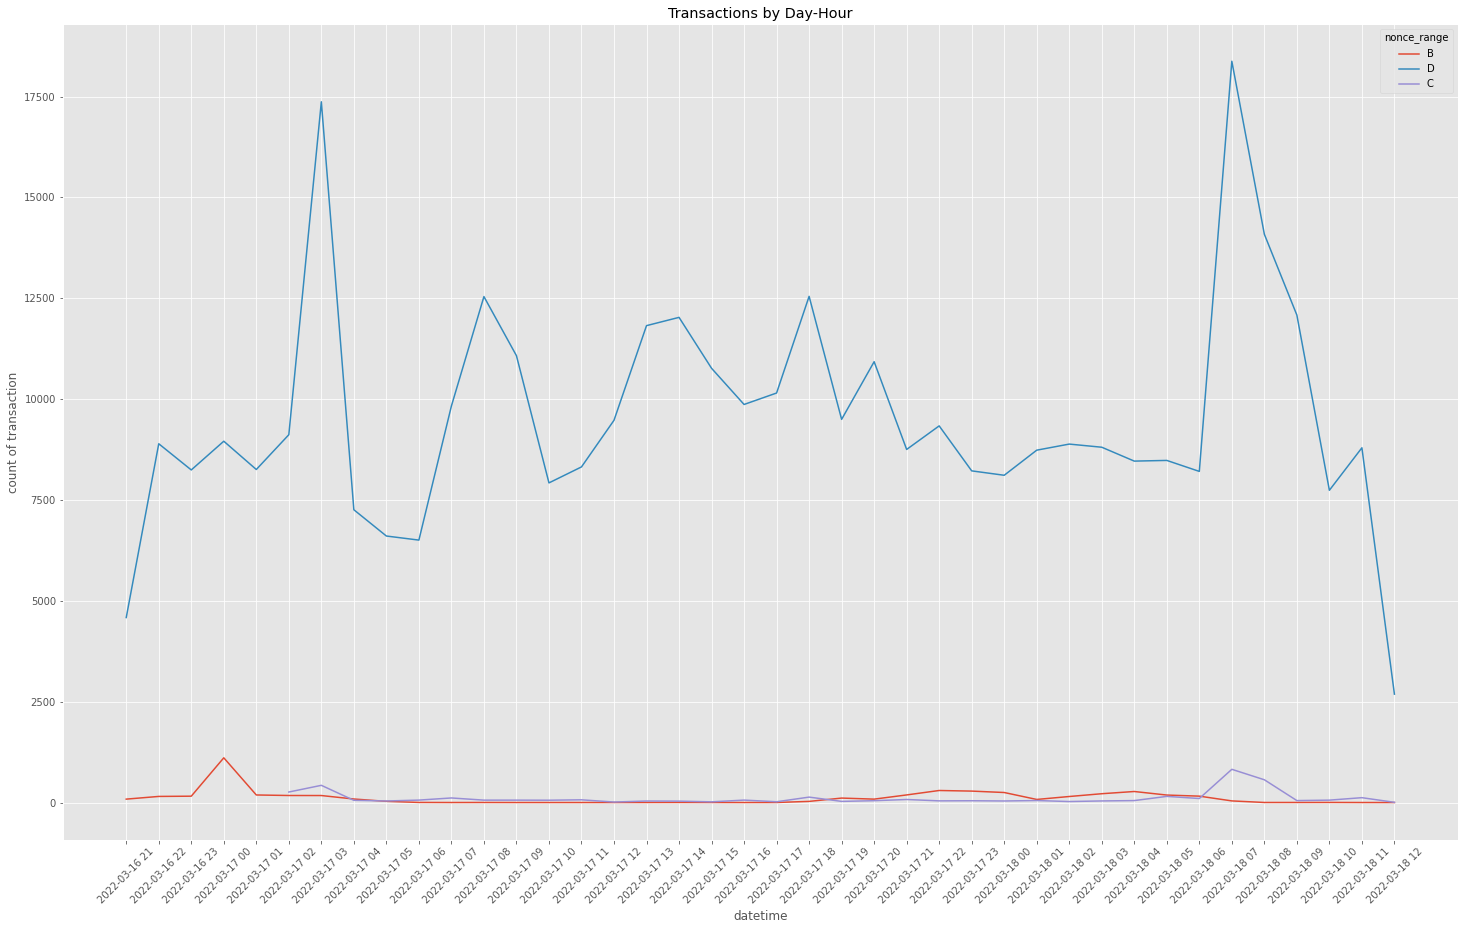

In [57]:
plt.figure(figsize=(25,15))
sns.lineplot(count_dayHour_nonceRange_from_address['date3'], count_dayHour_nonceRange_from_address['count'], hue=count_dayHour_nonceRange_from_address['nonce_range'])
plt.title('Transactions by Day-Hour')
plt.xticks(rotation= 45)
plt.xlabel('datetime')
plt.ylabel('count of transaction')
plt.show()

__Comments:__ 

Getting frequency of nonce_range of mains "to_address"

In [59]:
count_dayHour_nonceRange_to_address = main_to_addresses.groupby(['date3', 'nonce_range']).size().reset_index(name='count')
count_dayHour_nonceRange_to_address

,date3,nonce_range,count
0,2022-03-16 21,A,8993
1,2022-03-16 21,B,1214
2,2022-03-16 21,C,204
3,2022-03-16 21,D,1683
4,2022-03-16 22,A,14008
...,...,...,...
155,2022-03-18 11,D,3877
156,2022-03-18 12,A,5030
157,2022-03-18 12,B,838
158,2022-03-18 12,C,143


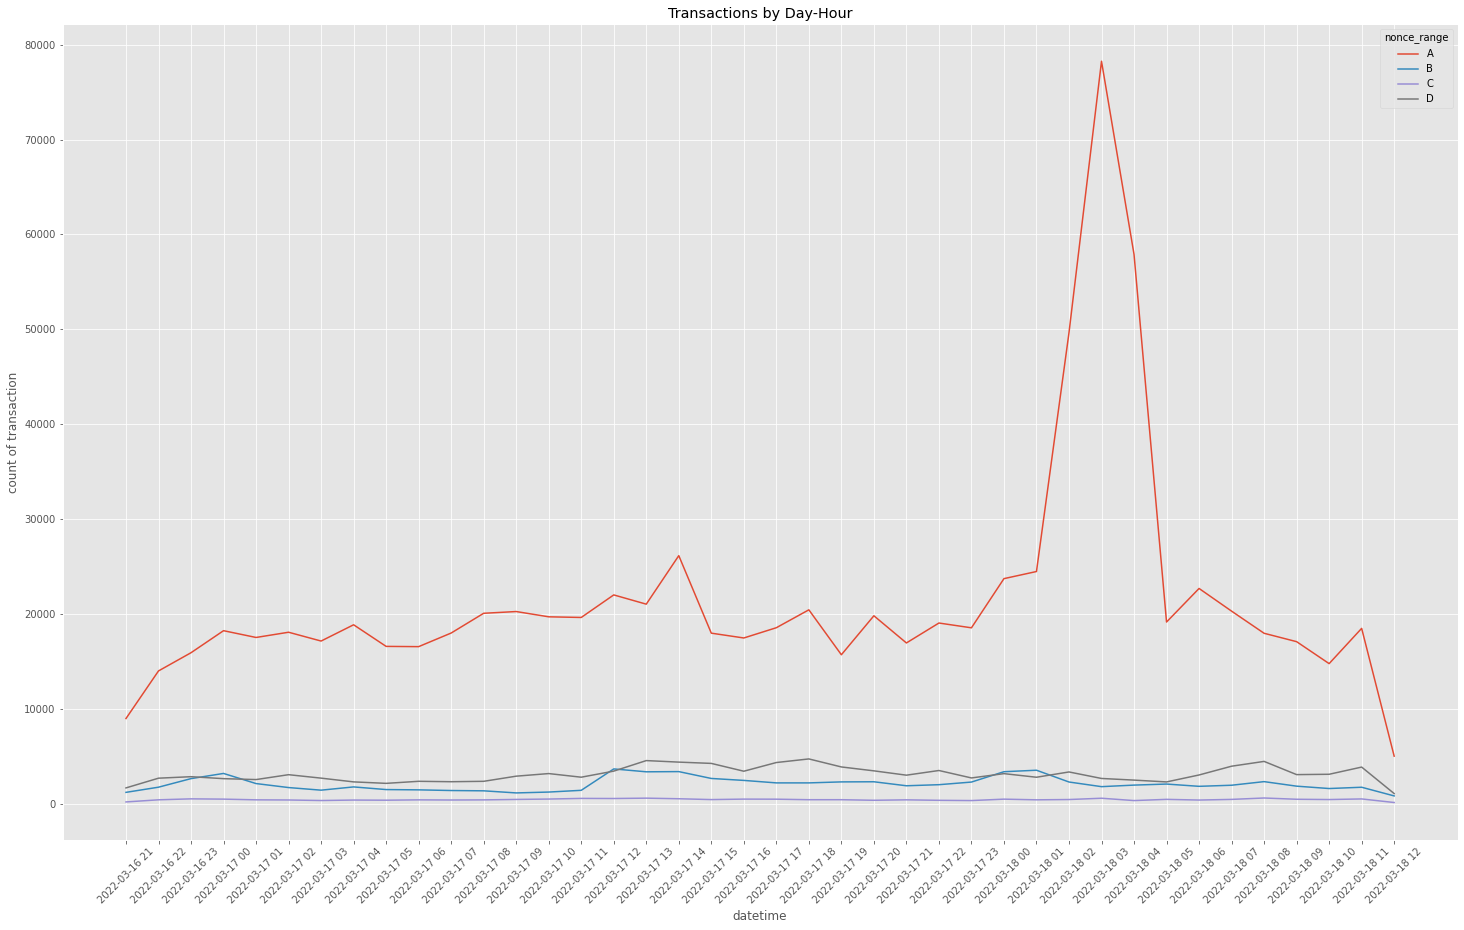

In [60]:
plt.figure(figsize=(25,15))
sns.lineplot(count_dayHour_nonceRange_to_address['date3'], count_dayHour_nonceRange_to_address['count'], hue=count_dayHour_nonceRange_to_address['nonce_range'])
plt.title('Transactions by Day-Hour')
plt.xticks(rotation= 45)
plt.xlabel('datetime')
plt.ylabel('count of transaction')
plt.show()